<a href="https://colab.research.google.com/github/rsnbgt/human_emotion_detection/blob/main/human_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix

Data Loading

In [7]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
  0% 0.00/121M [00:00<?, ?B/s]
100% 121M/121M [00:00<00:00, 1.34GB/s]


In [22]:
!mkdir /content/datasets
!unzip -q face-expression-recognition-dataset.zip -d /content/datasets/

mkdir: cannot create directory ‘/content/datasets’: File exists
replace /content/datasets/images/images/train/angry/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All


In [9]:
Atrain_dir="/content/datasets/images/images/train"
validation_dir="/content/datasets/images/images/validation"

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen=ImageDataGenerator(
    rescale=1./255
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


EDA

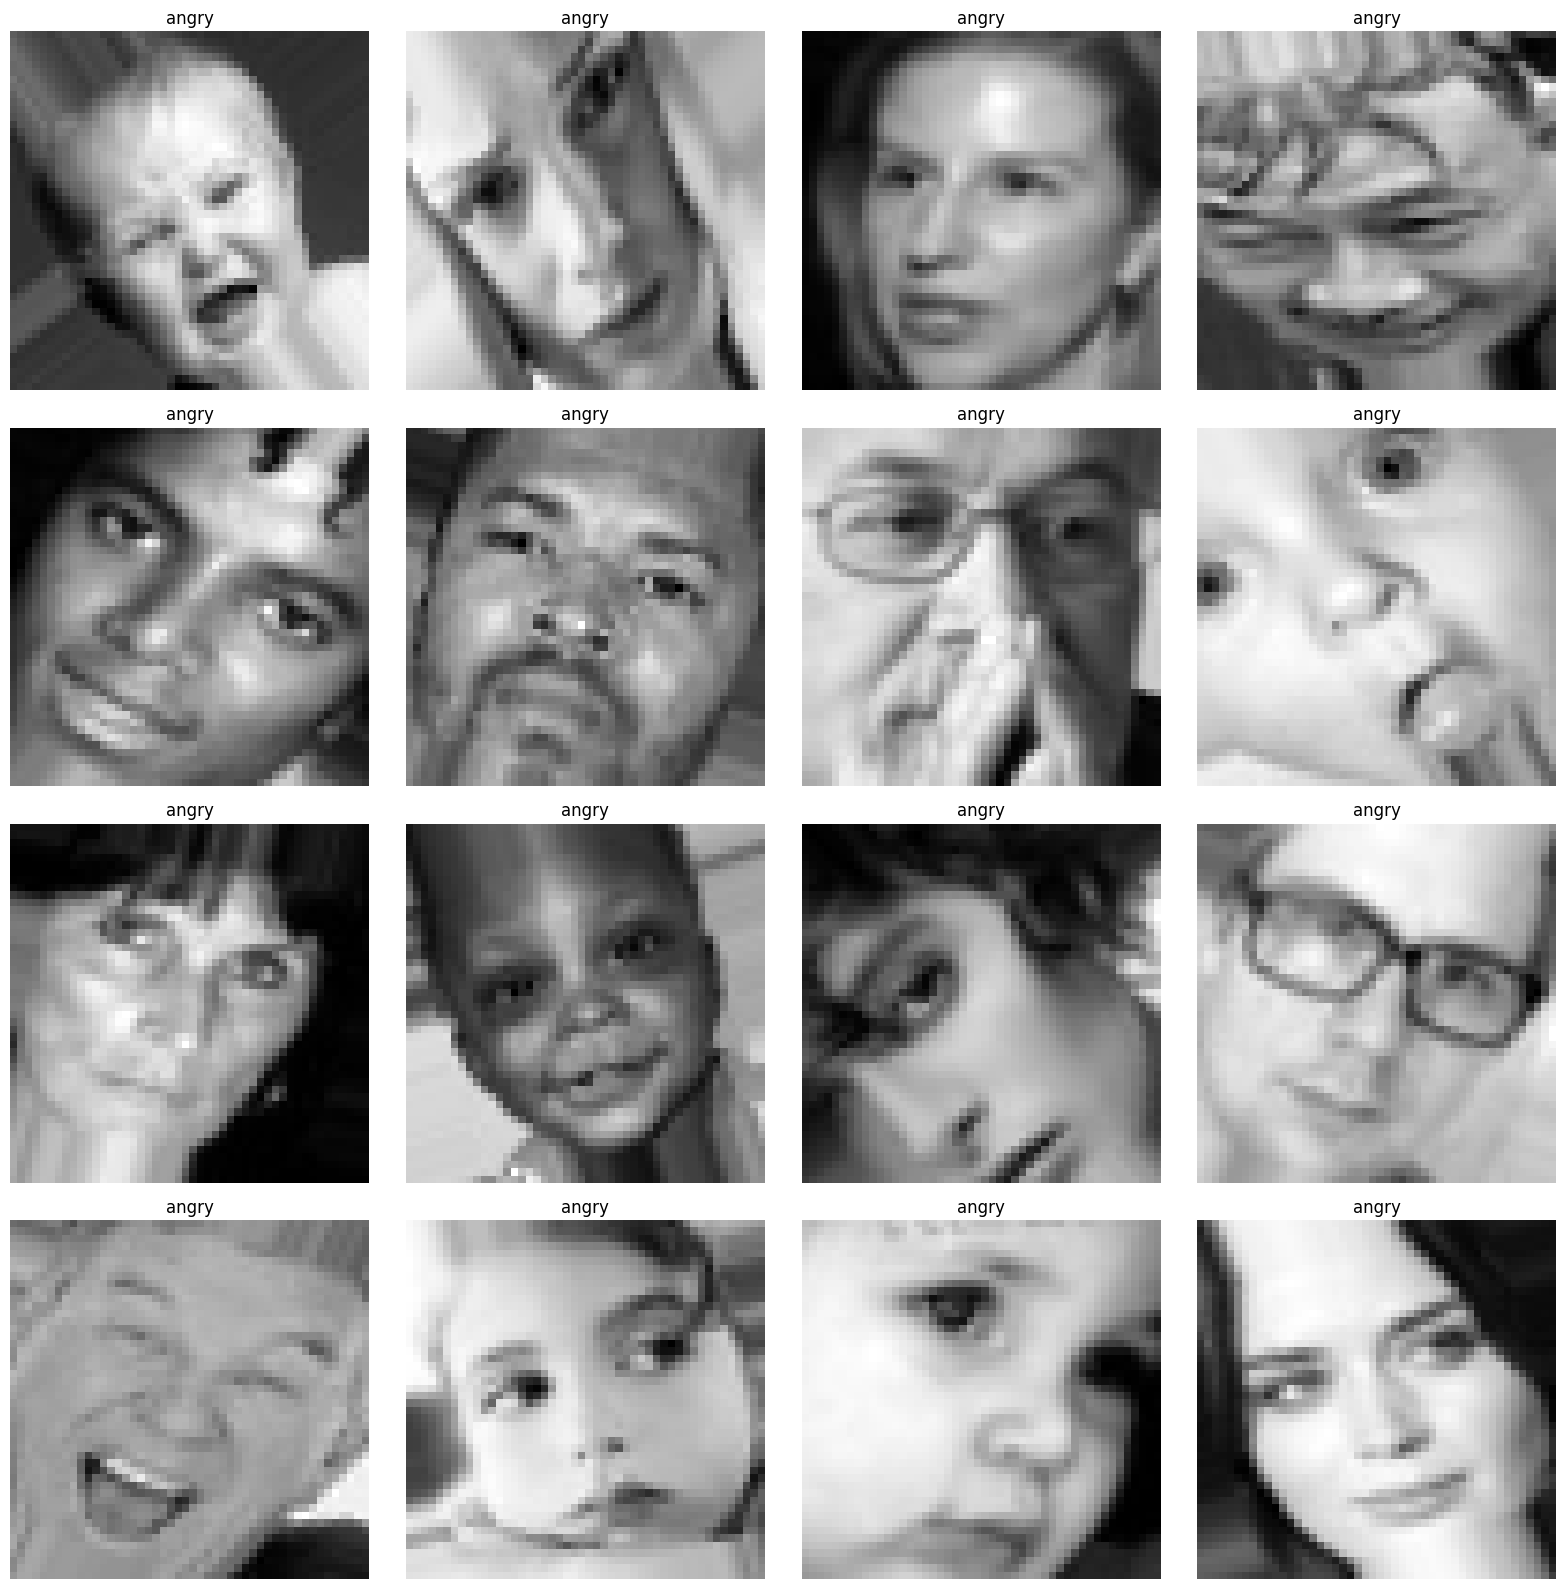

In [11]:
class_names=list(train_generator.class_indices.keys())

images,labels=next(train_generator)

plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.title(class_names[np.argmax(labels)])
  plt.axis('off')
plt.tight_layout()
plt.show()

Model

In [15]:
model=Sequential([
    #convolutional layer

    #layer1
    Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    #layer2
    Conv2D(256,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(256,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    #layer3
    Conv2D(512,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(512,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.35),

    #layer4
    Conv2D(512,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(512,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),

    #layer5
    Conv2D(512,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(512,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),


    Flatten(),

    #classification
    Dense(2048,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),


    #output layer
    Dense(7,activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 17,196,935 (65.60 MB)

 Trainable params: 17,183,111 (65.55 MB)

 Non-trainable params: 13,824 (54.00 KB)

Model Training

In [16]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
lr_scheduler=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history=model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[early_stopping,lr_scheduler]
)

Epoch 1/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 91s 162ms/step - accuracy: 0.1589 - loss: 3.0216 - val_accuracy: 0.2583 - val_loss: 1.9803 - learning_rate: 1.0000e-04
Epoch 2/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.1893 - loss: 2.5473 - val_accuracy: 0.2627 - val_loss: 1.8554 - learning_rate: 1.0000e-04
Epoch 3/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.2004 - loss: 2.3317 - val_accuracy: 0.2682 - val_loss: 1.8014 - learning_rate: 1.0000e-04
Epoch 4/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.2207 - loss: 2.1607 - val_accuracy: 0.2767 - val_loss: 1.7694 - learning_rate: 1.0000e-04
Epoch 5/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.2349 - loss: 2.0586 - val_accuracy: 0.2894 - val_loss: 1.7778 - learning_rate: 1.0000e-04
Epoch 6/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.2648 - loss: 1.9605 - val_accuracy: 0.3041 - val_loss: 1.7793 - learning_rate: 1.0000e-04
Epoch 7/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 61s 13

Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step
              precision    recall  f1-score   support

       angry       0.55      0.60      0.57        10
     disgust       1.00      1.00      1.00         1
        fear       0.50      0.50      0.50         4
       happy       0.90      0.82      0.86        22
     neutral       0.56      0.42      0.48        12
         sad       0.33      0.43      0.38         7
    surprise       0.60      0.75      0.67         8

    accuracy                           0.64        64
   macro avg       0.63      0.64      0.64        64
weighted avg       0.66      0.64      0.64        64



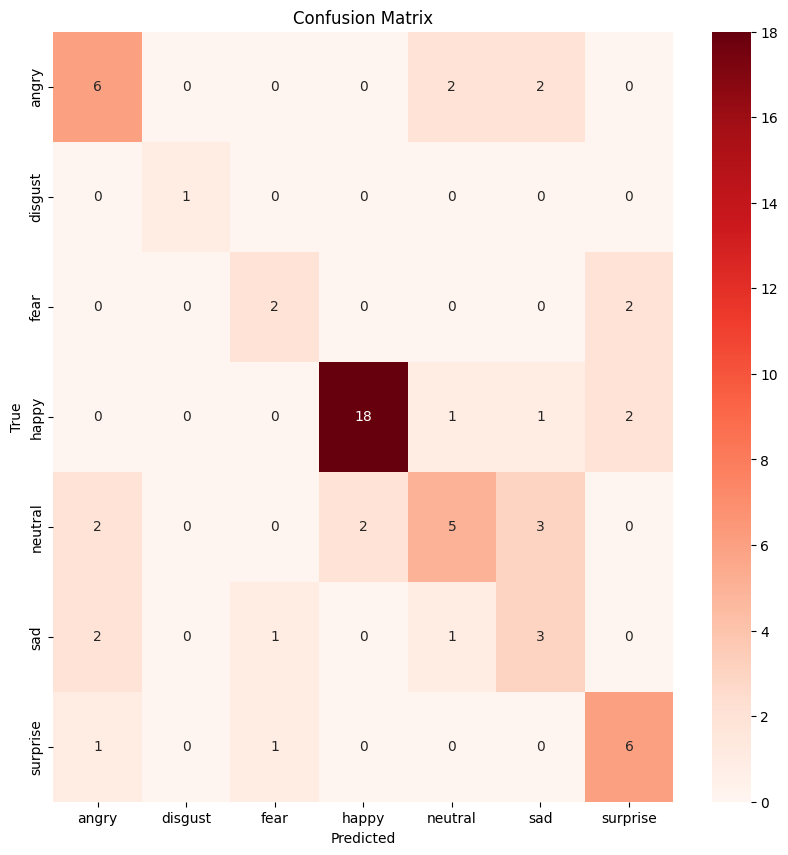

In [17]:
val_images,val_labels=next(validation_generator)
predictions=model.predict(val_images)

y_true=np.argmax(val_labels,axis=1)
y_pred=np.argmax(predictions,axis=1)

print(classification_report(y_true,y_pred,target_names=class_names))

cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Detection System

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


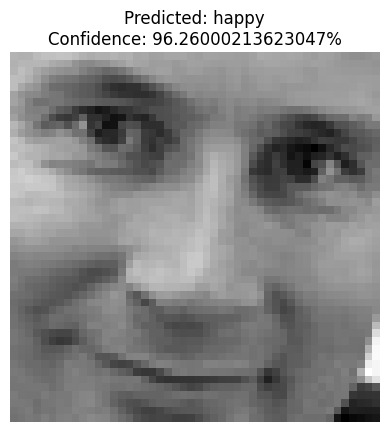

Emotion:happy,confidence:96.26000213623047%


In [18]:
from tensorflow.keras.preprocessing import image

def detect_emotion(image_path):
  img=image.load_img(image_path,target_size=(48,48),color_mode='grayscale')
  img_array=image.img_to_array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)

  prediction=model.predict(img_array)
  predicted_index=np.argmax(prediction)
  predicted_class=class_names[predicted_index]
  confidence=round(prediction[0][predicted_index]*100,2)

  plt.imshow(img,cmap='gray')
  plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence}%')
  plt.axis('off')
  plt.show()

  return predicted_class,confidence

predicted_emotion,confidence=detect_emotion("/content/datasets/images/validation/happy/10019.jpg")
print(f"Emotion:{predicted_emotion},confidence:{confidence}%")

Save Modal

In [19]:
model.save('facial_emotion_detection_model.h5')